In [10]:
#%%

[[참고1] 코드공유 > 따릉이 데이터를 활용한 데이터 분석 (실습파일)](https://dacon.io/competitions/open/235576/codeshare/1276?page=1&dtype=recent)

# 1️⃣  <span style = 'background-color: lightgreen ; color:black'>**library 및 data load**</span>

In [7]:
#%%
import pandas as pd #판다스 패키지 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #랜덤 포레스트 불러오기

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# 데이터 불러오기
train = pd.read_csv('data/train.csv') # 모델 학습 파일
test = pd.read_csv('data/test.csv') # 모델 시험지 파일
submission = pd.read_csv('data/submission.csv') #답안지 파일 ; 제출 파일 형식

# 2️⃣  <span style = 'background-color: lightgreen ; color:black'>**탐색적 자료분석**</span>
Exploratory Data Analysis (EDA)

### <span style = 'color:orange'> **df.shape** </span>
* df의 행, 열 개수 저장돼있는 <span style = 'color:red'>속성</span>

### <span style = 'color:orange'> **df.info()** </span>
* df의 col별 정보를 알려주는 <span style = 'color:red'>함수</span>
* 비어있지 않은 값 (non-null)은 몇 개인지?
* col의 type은 무엇인지?
    * type의 종류: int(정수), float(실수), object(문자열), ... (date, ...)

### <span style = 'color:orange'> **df.describe()** </span>
* 숫자형 (int, float) col들의 기술 통계량을 보여주는 <span style = 'color:red'>함수</span>

    * 기술통계량이란? <br>
        해당 col을 대표할 수 있는 통계값들을 의미 <br>
        <br>
    * 기술통계량 종류 <br>
        ```
        * count:     해당 column에서 비어있지 않은 값의 개수
        * mean:      평균
        * std:       표준편차
        * min:       최솟값 (이상치 포함)
        * 25% (Q1):  전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값
        * 50% (Q2):  중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)
        * 75% (Q3):  전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값
        * max:       최댓값 (이상치 포함)
        ```
        <br>
    * 이상치: 울타리 밖에 있는 부분을 이상치라고 정의 <br>
        ```
        * 아래쪽 울타리: Q_1Q1 -1.5 * IQR1.5 * IQR
        * 위쪽 울타리:   Q_3Q3 + 1.5 * IQR1.5 * IQR
        * IQRIQR =      Q_3 - Q_1Q3 - Q1
        ```

### <span style = 'color:orange'> **df.head(n)** </span>
* df의 위에서부터 n개 행을 보여주는 <span style = 'color:red'>함수</span>
* n default = 5

### <span style = 'color:orange'> **df.tail(n)** </span>
* df의 아래에서부터 n개 행을 보여주는 <span style = 'color:red'>함수</span>
* n default = 5

### <span style = 'color:orange'> **df.groupby()** </span>
* 집단에 대한 통계량 확인

ex) 습한 날의 count의 평균 이런 걸 볼 수 있음. (우선 습한 정도를 어느정도 기준에 따라 <<심하다/ 보통이다/ 전혀 습하지 않다>> 정도로 전처리 해야함.)

## <span style = 'color:green'> **visualization** </span>

In [1]:
import matplotlib.pyplot as plt

<Figure size 864x216 with 0 Axes>

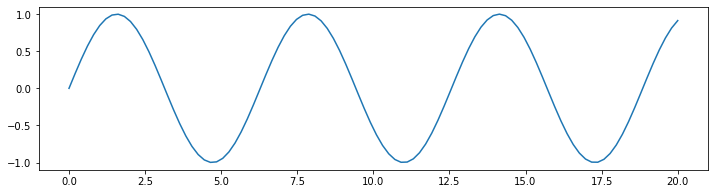

In [17]:
#%%
import numpy as np

x = np.linspace(0, 20, 100)
plt.figure(figsize = (12,3))
plt.plot(x, np.sin(x))

plt.show()


# <span style = 'background-color: lightgreen ; color:black'>**시각화**</span>

[그림판 크기 설정 참고](https://www.delftstack.com/ko/howto/matplotlib/how-to-change-the-figure-size-in-matplotlib/) <br>
[plt 참고 2](https://cool24151.tistory.com/16)

## <span> 1. Matplotlib이란? </span>


#### (1) Matplotlib 기능
파이썬에서 기본적인 시각화 기능을 제공해줌. <br>
pyplot 객체를 사용해서 데이터를 시각화하여 표시해주는데, <br>
<br>

이 때 데이터는 ***numpy***나 ***list*** 형태 또는 ***pandas의 series 객체***를 사용해주면 됨. <br>
pyplot 객체에 그래프들이 하나하나 쌓인 후에 plt.show()를 해주면 <u>쌓아온 그래프들이 모두 출력</u>됨. <br>


#### (2) 장점
pyplot이라고 불리는 객체 안에 있는 figure(=모판)에 그림을 그리게 됨. <br>
따라서 ***plot***이라고 명령어를 계속 치게 되면 해당 그림판에 그림을 계속 그리고 있다가 <br>
***show***라는 명령어를 치게 되면<br>
지금까지 그림을 그렸던 그림판의 그림들을 모두 보여줌. <br>

#### (3) 단점
matplotlib 모듈의 최대 단점은 arguments들을 kwargs로 받는 것. <br>
<br>
즉, ***고정된 argument가 없기에*** <br>
Shift + Tab을 눌러도 어떻게 사용해야하는지에 대한 도움을 받기 힘들다. <br>
일반적으로 matplotlib 사이트에 들어가서 매뉴얼을 통해 확인하고 사용한다.

[kwargs](https://brunch.co.kr/@princox/180) : keyword arguments, 키워드를 제공함.

## <span style = 'color:green'> **2. 시각화 보조 기능** </span>

### <span style = 'color:lightgreen'> **(1) 여러개의 그림판 만들기** </span>

#### **그림판 크기** 설정

In [ ]:
_ = plt.figure(figsize = (12,3))

<Figure size 864x216 with 0 Axes>

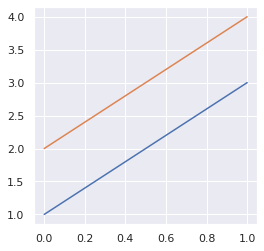

In [ ]:
_ = plt.rcParams['figure.figsize'] = (4,4) # plt.rcParams는 plt.plot 앞 뒤에 배치될 수 있다.
                                           # 동일한 스크립트에서 작성된 그림은 할당된 것과 동일한 그림크기를 공유한다.
                                           # 동일한 스크립트에서 figure.figsize를 여러 번 할당할 수 있지만
                                           # 생성된 그림에는 첫 번째 설정만 적용된다.
_ = plt.plot([[1,2],[3,4]])
_ = plt.show()
# import numpy as np
# # fig, ax = plt.subplots()
# ax.plot(range(100), [np.sin(value) for value in range(100)])
# ax.show()

#### <span style = 'color:orange'> **plt.figure()** </span>
: figure를 반환하는 함수

In [ ]:
fig = plt.figure()

<Figure size 288x288 with 0 Axes>

#### <span style = 'color:orange'> **fig.set_size_inches()** </span>
: figure의 크기를 조정하는 함수
* 그림을 생성한 후 matplotlib에서 그림 크기를 변경하려고 할 때 주로 사용 <br>
(figure를 이미 생성한 경우의 방법) <br>

set_size_inches에는 디폴트값이 True인 forward 옵션이 있고, <br>
이는 새 크기가 주어진 후 캔버스 크기가 ***자동으로 업데이트*** 됨을 의미한다.


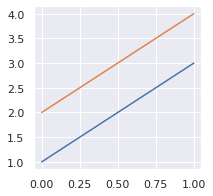

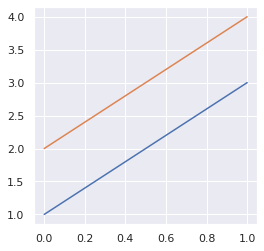

In [ ]:
fig1 = plt.figure(1)
_ = plt.plot([[1,2],[3,4]])
fig2 = plt.figure(2)
_ = plt.plot([[1,2],[3,4]])

fig1.set_size_inches(3,3)
fig2.set_size_inches(4,4)

_ = plt.show()

# fig1, fig2는 생성된 두 그림에 대한 참조


#### <span style = 'color:orange'> **fig.add_subplot()** </span>
: 하위 그림판을 생성해주는 함수

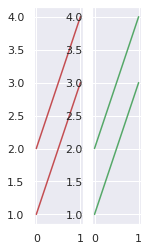

In [ ]:
fig = plt.figure()
ax_1 = fig.add_subplot(1,2,1) # 가로, 세로, n번째 열; n은 1이상
ax_2 = fig.add_subplot(1,2,2)

_ = ax_1.plot([[1,2],[3,4]], c = 'r') # c는 color 옵션
_ = ax_2.plot([[2,1],[4,3]], c = 'g')

_ = plt.show()

### <span style = 'color:lightgreen'> **(2) 색 설정** </span>
**color** 또는 **c** 인자를 사용하여 직접 색을 지정.

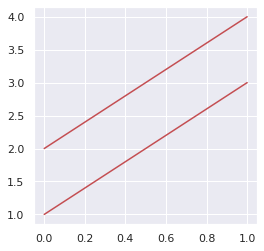

In [ ]:
_ = plt.plot([[1,2], [3,4]], color='r')

### <span style = 'color:lightgreen'> **(3) 선 스타일 설정** </span>
**linestyle** 혹은 **ls** 인자를 사용하여 직접 라인스타일을 지정한다.


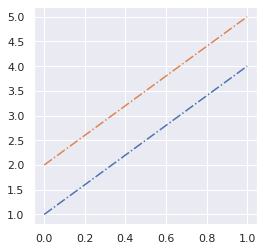

In [ ]:
_ = plt.plot([[1,2],[4,5]], ls = '-.')

### <span style = 'color:lightgreen'> **(4) 제목, 범례 설정** </span>

#### <span style = 'color:orange'> **plt.title('title of plot')** </span>
: plot의 제목을 만들어 줌.
<br>

#### <span style = 'color:orange'> **plt.legend(...)** </span>
: plot의 범례를 만들어줌 <br>
<br>
[범례 자세히 보기](https://codetorial.net/matplotlib/set_legend.html)

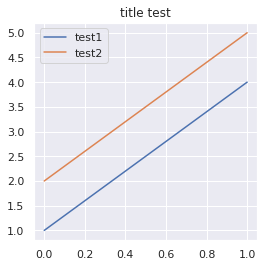

In [ ]:
_ = plt.plot([1,4], label = 'test1')
_ = plt.plot([2,5], label = 'test2')
_ = plt.title('title test')
_ = plt.legend()

## <span style = 'color:green'> **3. 다양한 시각화 plot** </span>

### <span style = 'color:orange'> **plt.bar(x,y, color = 'r', width = 0.25, ...)** </span>
* 반복
* stack

##### * 반복

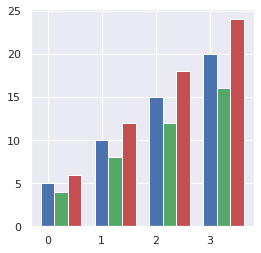

In [ ]:
data = [[5,10,15,20], [4,8,12,16], [6,12,18,24]]
x = np.arange(4)

_ = plt.bar(x+0,data[0],color = 'b', width = 0.25) # x에 간격주기
_ = plt.bar(x+0.25,data[1],color = 'g', width = 0.25)
_ = plt.bar(x+0.5,data[2],color = 'r', width = 0.25)

##### * 스택

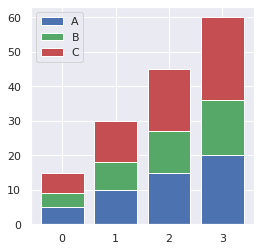

In [ ]:
data = np.array([[5,10,15,20], [4,8,12,16], [6,12,18,24]])
col_list = ['b','g','r']
lab_list = ['A', "B", 'C']

x = np.arange(data.shape[1])
for i in range(data.shape[0]):
    _ = plt.bar(x, data[i], bottom = np.sum(data[:i], axis = 0),
    color = col_list[i], label = lab_list[i])
_ = plt.legend()
_ = plt.show()

### <span style = 'color:orange'> **plt.hist(x, bins = 100)** </span>

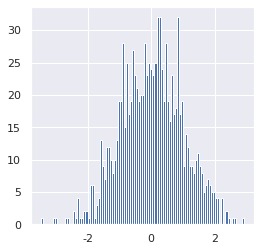

In [ ]:
x = np.random.normal(0,1,1000)
_ = plt.hist(x,bins = 100)

### <span style = 'color:orange'> **plt.boxplot(data)** </span>

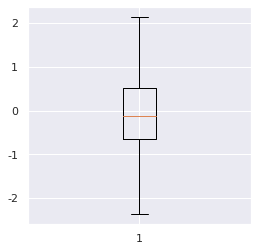

In [ ]:
x = np.random.normal(0,1,100) # 0~1사이를 정규랜덤으로 100개 뽑기
_ = plt.boxplot(x)

### <span style = 'color:orange'> **plt.scatter(x, y, marker = 마커, s = 사이즈, alpha = 0.5, ...)** </span>
* 산포도 <br>
겹치는 부분 시각화를 위해 투명도를 0.5 정도로 해준다.

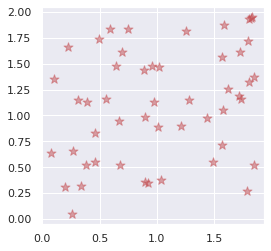

In [ ]:
x = np.random.uniform(0,2,50)
y = np.random.uniform(0,2,50)
_ = plt.scatter(x, y, marker = '*', s = 90, alpha = 0.5, color = 'r')

### <span style = 'color:orange'> **matplotlib with pandas** </span>
dataframe이나 series 별로 데이터를 그릴 수 있도록 지원해준다.

* 각 변수 별로 선택해 시각화

In [ ]:
iris = pd.read_csv('iris.csv')
fig = plt.figure()
sub = []
for i in range(1,5) : 
    sub.append(fig.add_subplot(2,2,i))
sub[0].scatter(iris['SepalLength'],iris['SepalWidth'])
sub[1].scatter(iris['SepalLength'],iris['PetalLength'])
sub[2].scatter(iris['SepalWidth'],iris['PetalWidth'])
sub[3].scatter(iris['SepalWidth'],iris['PetalLength'])

* 전체 데이터 시각화 한 번에

#### <span style = 'color:yellow'> **df.plot()** </span>
전체 데이터의 plot을 그려주는 함수. <br>

In [ ]:
iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']].plot()

#### <span style = 'color:yellow'> **pd.plotting.scatter_matrix(data, diagonal = 'kde' or 'hist', alpha = , figsize = )** </span>
전체 데이터의 산포도를 그려줌. <br>
diagonal 인자로 대각선의 각 변수를 histogram 혹은 density 중 어떤 형태로 그릴 것인지를 지정해줄 수 있음.

In [ ]:
pd.plotting.scatter_matrix(iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']], 
                           diagonal='kde', alpha=1, figsize=(20,20))

이 블로그의 작성자가 참고한 영상<br>
​Edwith - 머신러닝을 위한 파이썬 (Data Handling - Visualization - matplotlib) [비디오 파일]

### <span style = 'color:orange'> **plt.title(label, fontsize)** </span>
* 그래프 제목 생성

### <span style = 'color:orange'> **plt.xlabel(label, fontsize)** </span>
* x축 이름 설정

### <span style = 'color:orange'> **plt.ylabel(label, fontsize)** </span>
* y축 이름 설정

### <span style = 'color:orange'> **plt.axvline(x, color)** </span>
* 축을 가로지르는 <span style = 'color:red'>세로 선</span> 생성

### <span style = 'color:orange'> **plt.text(x, y, s, fontsize)** </span>
* 원하는 위치에 텍스트 생성

### <span style = 'color:orange'> **plt.plot의 스타일** </span>
- 색깔
```
문자열      약자
blue        b
green       g
red         r
cyan        c
magenta     m
yellow      y
black       k
white       w
```
<br>

- 마커
```
마커        의미
.           점
o           원 (알파벳)
v           역삼각형 (알파벳)
^           삼각형
s           사각형
*           별
x           엑스
d           다이아몬드
```
<br>

- 선
```
문자열      의미
-	    실선
--	    끊어진 실선
-.	    점+실선
:	    점선
```
<br>

## <span style = 'color:green'> **correlation** </span>
### <span style = 'color:orange'> **df.corr()** </span>
* correlation coefficient의 줄임말 <br>
<br>

* 상관계수: 두 개의 변수가 같이 일어나는 강도를 나타내는 수치.
* -1 ~ 1 사이의 값을 지님.
* -1이나 1인 수치는 현실 세계에서 관측되기 힘든 수치.
* 분야별로 기준을 정하는 것에 따라 달라지겠지만, <u>보통 <span style = 'color = red; font-size = 140%'>0.4 이상</span>이면 두 개의 변수 간에 상관성이 있다</u>고 얘기함.
<br>
<br>

* 💥💥💥상관관계는 인과관계와 다름 <br>
    ex) <br>    
    * 선글라스 판매량이 증가***함에 따라***, 아이스크림 판매액도 ***같이 증가***하는 것을 볼 수 있음.
    * 하지만 선글라스 판매량이 증가했기 ***때문에*** 아이스크림 판매액이 증가했다라고 해석하는 것은 타당하지 않음.
    * 선글라스 판매량이 증가했다는 것은 여름 ***때문***이라고 볼 수 있으므로, 날씨가 더워짐***에 따라*** 선글라스 판매량과 아이스크림 판매액이 같이 증가했다고 보는 것이 타당할 것임.
    <br>
    
    💥 상관관계 ; ~ 함에 따라 (반비례, 비례, ...) <br>
    💥 인과관계 ; ~ 때문에 (야기, 초래, ...)


#### seaborn

In [29]:
import seaborn as sns

* [sns plot 종류]
    - Relational Plot (연속 데이터 관련성)
        - replot
        - scatter
        - lineplot <br>
        <br>
    - Categorical Plot (카테고리 데이터 변화)
        - catplot
        - stripplot
        - swarmplot
        - boxplot
        - violinplot
        - pointplot
        - barplot
        - countplot <br>
        <br>
    - Distribution Plot (데이터 분포)
        - distplot
        - kdeplot
        - rugplot <br>
        <br>
    - Regression Plot (데이터 분포 회귀선)
        - lmplot
        - regplot
        - residplot <br>
        <br>
    - Matrix Plot (여러가지 변수 비교)
        - heatmap
        - clustermap <br>
        <br>
    - Multi-plot grid (여러 개의 그래프)
        - Facetgrid
        - Pairgrid
        - Jointgrid <br>
        <br>
```
데이터의 종류가 연속형 데이터인지, 카테고리 데이터인지, 내가 궁금한 내용이 데이터의 시계열적 변화인지 분포인지에 따라 적합한 그래프를 선택해서 도식화하는 방법을 익힌다면 충분합니다.
```
<br>

[seaborn 시각화 참고자료](https://wikidocs.net/86290)

# 3️⃣  <span style = 'background-color: lightgreen ; color:black'>**데이터 전처리**</span>
Data Cleansing & Pre-Processing

### <span style = 'color:orange'> **srs.isna()** </span>
* 결측치 여부를 확인해줌.
* 결측치면 True, 아니면 False

### <span style = 'color:orange'> **df.fillna()** </span>
* 결측치를 <u>채우고자 하는 column</u>과 <br>
    결측치를 <u>대신하여 넣고자 하는 값</u>을 명시해 줘야 함.

# 4️⃣  <span style = 'background-color: lightgreen ; color:black'>**변수 선택 및 모델 구축**</span>
Feature Engineering & Initial Modeling <br>

### <span style = 'color:orange'> **sklearn.ensemble.RandomForestRegressor()** </span>
* 랜덤 포레스트 모형


# 5️⃣  <span style = 'background-color: lightgreen ; color:black'>**모델 학습 및 검증**</span>
Model Tuning & Evaluation

### <span style = 'color:orange'> **model.fit()** </span>
* 모델 학습

### <span style = 'color:orange'> **model.predict()** </span>
* 모델 예측

### <span style = 'color:orange'> **df.to_csv()** </span>
* csv 파일 저장하는 함수

# 6️⃣  <span style = 'background-color: lightgreen ; color:black'>**결과 및 결언**</span>
Conclusion & Discussion